In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as Func
import sklearn.datasets
import matplotlib.pyplot as plt

We can create a moon type dataset with sklearn

In [19]:
x,y = sklearn.datasets.make_moons(2000, noise = 0.25 )
print(x.shape)
print(y.shape)

(2000, 2)
(2000,)


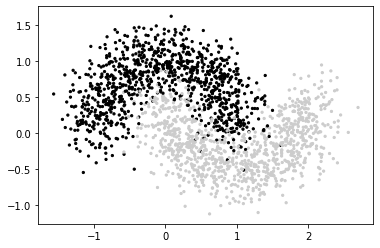

In [20]:
plt.scatter(x[:,0],x[:,1], s=5, c = y, cmap= plt.cm.nipy_spectral)
plt.show()

In [21]:
# convert the dataset to tensor
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [22]:
print(x)

tensor([[ 0.6536,  0.9121],
        [ 0.8484,  0.3607],
        [-0.7243,  0.9318],
        ...,
        [ 2.2900,  0.4077],
        [ 1.7854,  0.0047],
        [ 0.8334,  0.7741]])


In [23]:
class FeedForward(torch.nn.Module):
    def __init__(self,_inputNeurons, _hiddenNeurons1th, _hiddenNeurons2th, _outputNeurons):
        super(FeedForward, self).__init__()
        self._inputLayer = nn.Linear(_inputNeurons,_hiddenNeurons1th)
        self._hiddenLayer = nn.Linear(_hiddenNeurons1th,_hiddenNeurons2th)
        self._outputLayer = nn.Linear(_hiddenNeurons2th,_outputNeurons)
    def forward(self,x):
       x = self._inputLayer(x)
       x = Func.relu(x)
       x = self._hiddenLayer(x)
       x = Func.relu(x)
       x = self._outputLayer(x)
       #x = Func.softmax(x)
       return x

In [24]:
_network = FeedForward(_inputNeurons=2,_hiddenNeurons1th=30, _hiddenNeurons2th=10, _outputNeurons=2)
_optimizer = torch.optim.SGD(_network.parameters(), lr = 0.01)
_loss_func = torch.nn.CrossEntropyLoss()

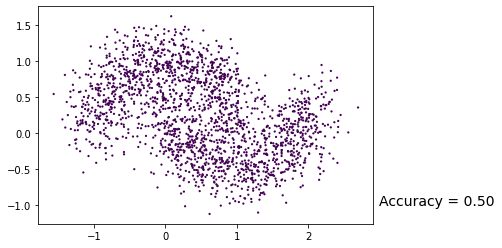

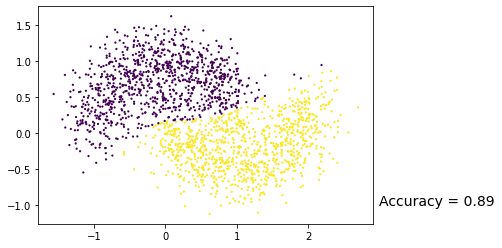

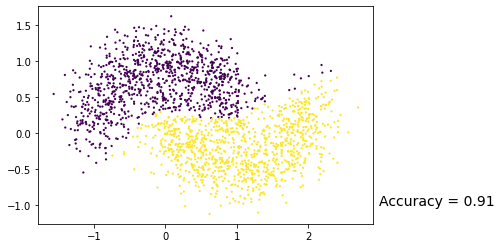

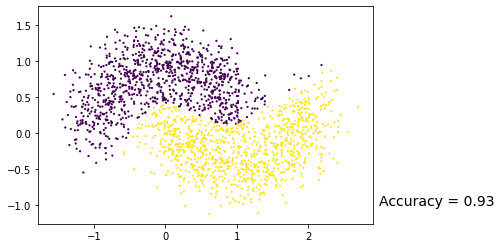

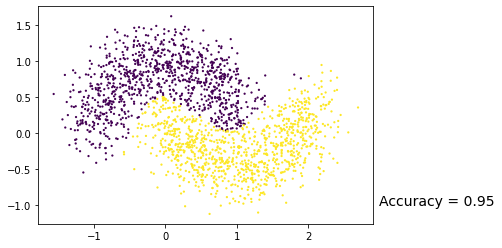

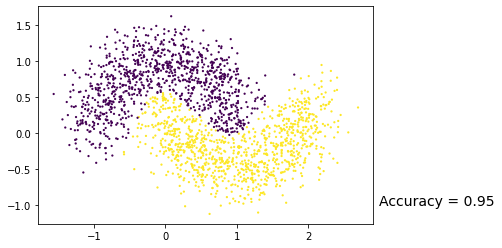

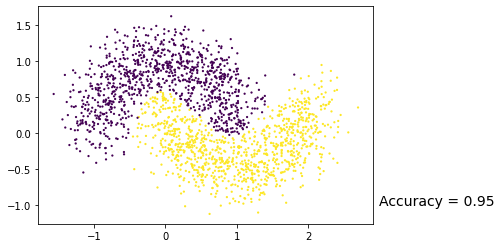

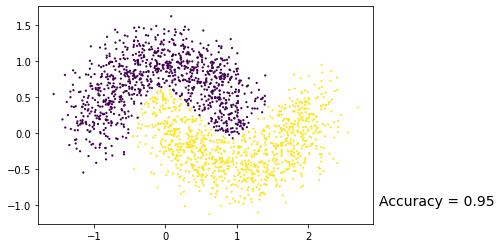

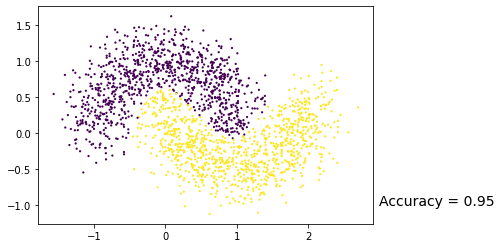

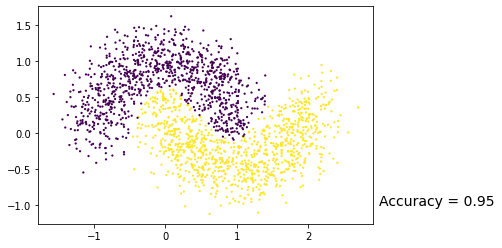

In [25]:
plt.ion()
for epoch in range(10000):
    _out = _network(x)
    _loss = _loss_func(_out,y)
    _optimizer.zero_grad()
    _loss.backward()
    _optimizer.step()

    if epoch % 1000 == 0:
        _max_value, _prediction = torch.max(_out,1)
        _prediction_y = _prediction.data.numpy()
        _target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s = 5, c = _prediction_y, lw = 0)
        accuracy = (_prediction_y == _target_y).sum() / _target_y.size
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)
        # show the learning process up until now

plt.ioff()
plt.show()